In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sns

In [3]:
df=pd.read_csv('C:\Iris flower details\IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


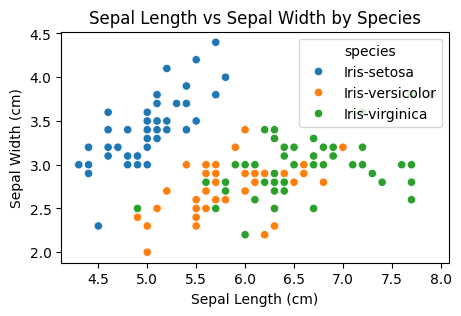

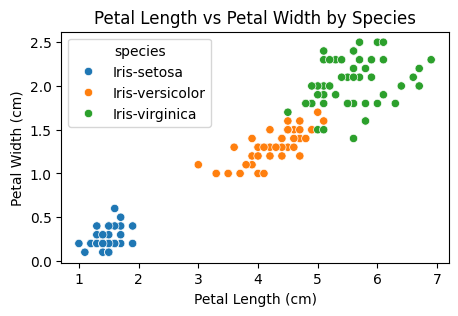

In [5]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.title('Sepal Length vs Sepal Width by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

plt.figure(figsize=(5, 3))
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df)
plt.title('Petal Length vs Petal Width by Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

In [8]:
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def evaluate_model(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='weighted')
  return accuracy, f1

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

for model_name, model in models.items():
    accuracy, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)
    print(f"{model_name}:")
    print(f"  Accuracy: {accuracy*100:.2f}%")
    print(f"  F1 Score: {f1*100:.2f}%")
    print("-" * 20)

Logistic Regression:
  Accuracy: 95.56%
  F1 Score: 95.56%
--------------------
Decision Tree:
  Accuracy: 95.56%
  F1 Score: 95.56%
--------------------
Random Forest:
  Accuracy: 95.56%
  F1 Score: 95.56%
--------------------
Support Vector Machine:
  Accuracy: 95.56%
  F1 Score: 95.56%
--------------------
K-Nearest Neighbors:
  Accuracy: 95.56%
  F1 Score: 95.56%
--------------------


In [9]:
def predict_flower_species(sepal_length, sepal_width, petal_length, petal_width):
  input_data = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]],columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
  input_data_scaled = scaler.transform(input_data)
  prediction = model.predict(input_data_scaled)[0]
  return prediction

sepal_length = float(input("Enter sepal length (cm): "))
sepal_width = float(input("Enter sepal width (cm): "))
petal_length = float(input("Enter petal length (cm): "))
petal_width = float(input("Enter petal width (cm): "))
predicted_species = predict_flower_species(sepal_length, sepal_width, petal_length, petal_width)
print(f"The predicted species of the Iris flower is: {predicted_species}")

Enter sepal length (cm):  3.4
Enter sepal width (cm):  3
Enter petal length (cm):  2.9
Enter petal width (cm):  2.6


The predicted species of the Iris flower is: Iris-versicolor
